In [173]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset/used_car_dataset.csv


Load the dataset and look at the first few rows of data.

In [174]:
df = pd.read_csv('/kaggle/input/used-car-dataset/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


Let's see the total number of rows and columns.

In [175]:
df.shape

(9582, 11)

Let's see if we have any missing values in this table.

In [176]:
df.info()       # Information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


All of the features except 'kmDriven' are complete.

In [177]:
# Count missing values in 'kmDriven'
missing_values = df.kmDriven.isna().sum()

# Display the result
print(f'The kmDriven feature is missing {missing_values} values')

The kmDriven feature is missing 47 values


Let's see the rows with missing kmDriven and see if we can spot any similarities between the entries.

In [178]:
# Show rows where column kmDriven has missing values
rows_with_missing = df[df['kmDriven'].isna()]

# Display the result
print(rows_with_missing)

              Brand              model  Year  Age kmDriven Transmission  \
231   Maruti Suzuki           Alto-800  2019    5      NaN       Manual   
353          Toyota             Innova  2016    8      NaN       Manual   
444           Honda            City ZX  2024    0      NaN    Automatic   
476         Hyundai        Santro Xing  2010   14      NaN    Automatic   
608          Toyota              Etios  2012   12      NaN       Manual   
793           Skoda             Kushaq  2010   14      NaN    Automatic   
976        Mahindra    Bolero Neo Plus  2015    9      NaN    Automatic   
1164       Mahindra         Bolero Neo  2023    1      NaN       Manual   
1199           Tata             Indica  2014   10      NaN       Manual   
1413        Hyundai        Santro Xing  2007   17      NaN       Manual   
1978           Tata          Tiago Nrg  2021    3      NaN    Automatic   
2680  Maruti Suzuki         Zen-Estilo  2008   16      NaN    Automatic   
2847  Maruti Suzuki      

I'm seeing a lot of 'Maruti Suzuki' entries. I wonder how common this Brand is in India? There are a few rows with this value for Brand in the rows with missing prices. Let's see how many rows have 'Maruti Suzuki' as the Brand in the whole dataset.

In [179]:
# Count rows where model has the value "Maruti Suzuki"
rows_count = (df['Brand'] == 'Maruti Suzuki').sum()
rows_count

2720

OK! That's a lot more than I expected. I don't think we need to worry too much about the large representation of 'Maruti Suzuki' branded cars in the rows with missing prices.

Next Let's remove the rows with missing 'kmDriven' values.

In [180]:
#  Clean up the kmDriven text
df["kmDriven"] = (
    df["kmDriven"]
    .str.replace(",", "", regex=False)
    .str.replace(" km", "", regex=False)
    .astype(float)  # Convert to float
)

# Drop rows with NaN in kmDriven
df = df.dropna(subset=["kmDriven"])

# Convert to integer
df["kmDriven"] = df["kmDriven"].astype(int)

Let's also clean up Ask Price.

In [181]:
#  Clean up the kmDriven text
df["AskPrice"] = (
    df["AskPrice"]
    .str.replace(",", "", regex=False)
    .str.replace("₹", "", regex=False)
    .astype(float)  # Convert to float
)

# Convert to integer
df["AskPrice"] = df["AskPrice"].astype(int)

In [182]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...",195000
1,Toyota,Innova,2009,15,190000,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",375000
2,Volkswagen,VentoTest,2010,14,77246,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",184999
3,Maruti Suzuki,Swift,2017,7,83500,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000
4,Maruti Suzuki,Baleno,2019,5,45000,Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",685000


Are the rows with missing values gone?

In [183]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Yes they are! The dataset has no missing values now.

In [184]:
df.dtypes

Brand           object
model           object
Year             int64
Age              int64
kmDriven         int64
Transmission    object
Owner           object
FuelType        object
PostedDate      object
AdditionInfo    object
AskPrice         int64
dtype: object

Now we need to look at some of these columns and determine the type of data in them, and how we may need to encode some of them.

In [185]:
unique_counts = df.nunique(dropna=False)

# Display the result
print(unique_counts)

Brand             38
model            398
Year              32
Age               32
kmDriven        1745
Transmission       2
Owner              2
FuelType           3
PostedDate        12
AdditionInfo    7270
AskPrice        1326
dtype: int64


Here are the unique Brands. Let's look for any accidental duplicates caused by mispelling or other causes.

In [186]:
# Show unique values of Brand
unique_brands = sorted(df["Brand"].unique())

# Display the result
print(unique_brands)

['Ambassador', 'Ashok', 'Aston Martin', 'Audi', 'BMW', 'Bajaj', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Rolls-Royce', 'Skoda', 'Ssangyong', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


Good. They are all unique brands.

Let's check for typos in Year and Age.

In [187]:
# Show unique values of Year
unique_years = sorted(df["Year"].unique())

# Display the result
print(unique_years)

[1986, 1990, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [188]:
# Show unique values of Age
unique_ages = sorted(df["Age"].unique())

# Display the result
print(unique_ages)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 38]


No typos.

Now let's check the unique values of Transmission, Owners, and FuelType.

In [189]:
# Show unique values of Transmission
unique_transmissions = sorted(df["Transmission"].unique())

# Display the result
print(unique_transmissions)

['Automatic', 'Manual']


In [190]:
# Show unique values of Owner
unique_owners = sorted(df["Owner"].unique())

# Display the result
print(unique_owners)

['first', 'second']


In [191]:
# Show unique values of FuelType
unique_fuel_types = sorted(df["FuelType"].unique())

# Display the result
print(unique_fuel_types)

['Diesel', 'Hybrid/CNG', 'Petrol']


See which variables relate to each other.

Plot AskPrice versus Transmission, Owner, and FuelType.

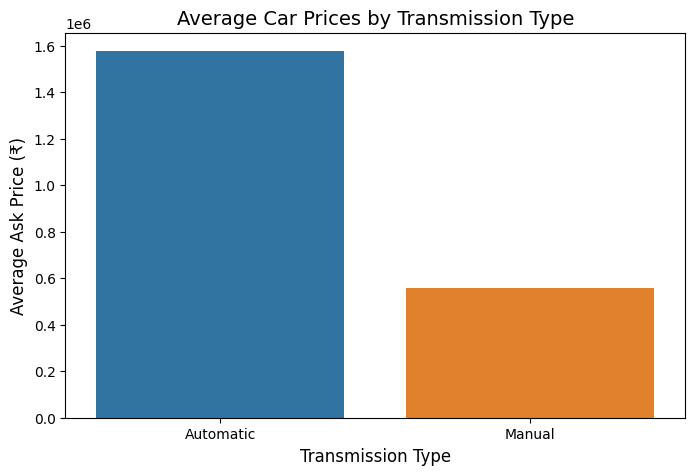

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Transmission')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Transmission', 
    y='AskPrice'
)
plt.title('Average Car Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

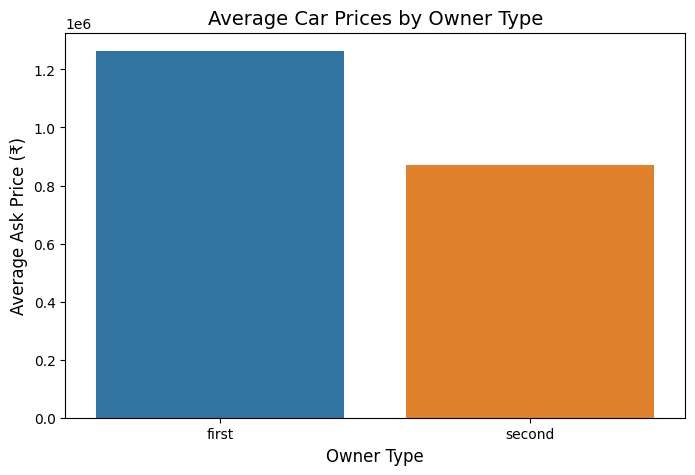

In [193]:
# Group by owner type and calculate average price
price_trends_by_owner = (
    df.groupby('Owner')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by owner
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_owner, 
    x='Owner', 
    y='AskPrice'
)
plt.title('Average Car Prices by Owner Type', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

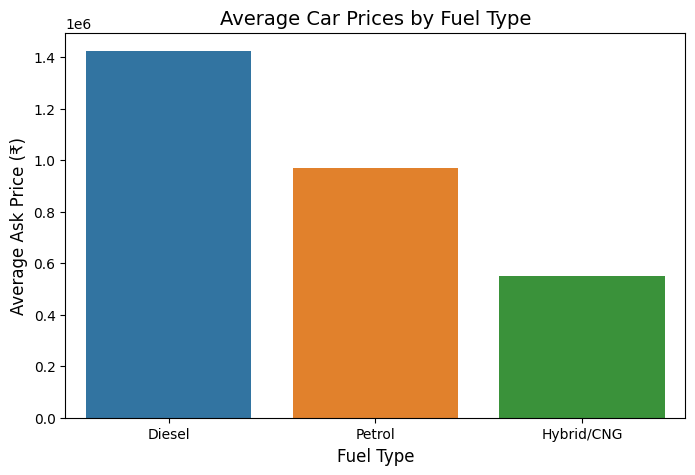

In [194]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('FuelType')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='FuelType', 
    y='AskPrice'
)
plt.title('Average Car Prices by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

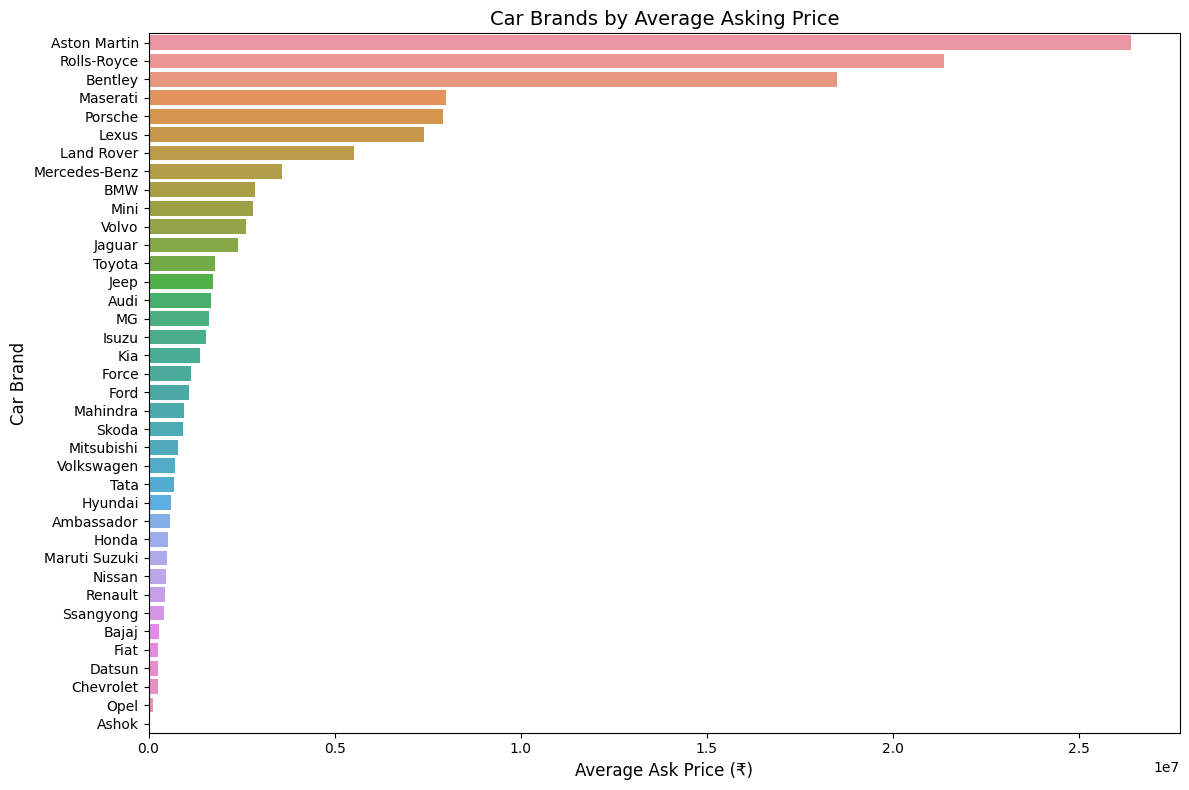

In [195]:
# Calculating average price by brand
price_trends_by_brand = (
    df.groupby('Brand')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Sorting for visualization
top_brands = price_trends_by_brand.sort_values(by='AskPrice', ascending=False)

# Plotting the chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_brands, 
    x='AskPrice', 
    y='Brand'
)
plt.title('Car Brands by Average Asking Price', fontsize=14)
plt.xlabel('Average Ask Price (₹)', fontsize=12)
plt.ylabel('Car Brand', fontsize=12)
plt.tight_layout()
plt.show()

In [196]:
X = df.copy()
y = X.pop("AskPrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [197]:
X.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo
0,0,0,2001,23,98000,0,0,0,0,0
1,1,1,2009,15,190000,0,0,1,1,1
2,2,2,2010,14,77246,0,1,1,0,2
3,3,3,2017,7,83500,0,0,1,0,3
4,3,4,2019,5,45000,1,1,0,0,4


In [198]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show features with their MI scores

AdditionInfo    3.299824
model           1.176838
Brand           0.464472
kmDriven        0.435856
Year            0.413612
Age             0.413612
Transmission    0.123815
FuelType        0.122195
Owner           0.053123
PostedDate      0.008726
Name: MI Scores, dtype: float64

In [199]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

**Columns to be dropped from 'X':**
* AdditionalInfo - This has redundant information.
* Age - Essentially contains the same information as 'Year'.
* PostedDate - Has insignificant contributions to the target.

In [200]:
X = X.drop(columns=['AdditionInfo', 'PostedDate', 'Age'])

In [201]:
X.head()

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType
0,0,0,2001,98000,0,0,0
1,1,1,2009,190000,0,0,1
2,2,2,2010,77246,0,1,1
3,3,3,2017,83500,0,0,1
4,3,4,2019,45000,1,1,0


Separate numerical and categorical columns.

In [202]:
numerical_features = ['Year', 'kmDriven']  # numerical columns
categorical_features = ['Brand', 'Transmission', 'FuelType', 'Owner']


Scale the numerical features.

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

In [204]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_scaled[categorical_features])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
model_frequency = X['model'].value_counts()
X['model_encoded'] = X['model'].map(model_frequency)

In [ ]:
X.head()